In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import signal
import pickle

In [2]:
def rossler(t, xyz, a, b, c, N, k, Iext, d):
    x = np.array(xyz[0:100])
    y = np.array(xyz[100:200])
    z = np.array(xyz[200:300])
    x_mean = np.mean(x)
    np.shape(x_mean)
    dxdt = -1.2*y - z + k * (d - x_mean)
    dydt = 1.2*x + a * y
    dzdt = b + z * (x - c)
    diff = []
    diff.extend(dxdt)
    diff.extend(dydt)
    diff.extend(dzdt)
    return np.array(diff).flatten()

In [92]:
a = 0.19
b = 0.2
c = 5.7
N = 100
Iext  = 0
d=8
np.random.seed(100)
x_intial = np.random.rand(N)
y_initial = np.random.rand(N)
z_initial = np.random.rand(N)
initial_vals = []
initial_vals.extend(x_intial)
initial_vals.extend(y_initial)
initial_vals.extend(z_initial)

k= 0.001 #1.5

t_span = (0, 200) #start to end
t_eval = np.linspace(*t_span, 100000) # dt=0.002 s or 50000 samples/sec


sol = solve_ivp(rossler, t_span, initial_vals, args=(a, b, c,N,k,Iext,d), t_eval=t_eval,vectorized=True,method='LSODA')

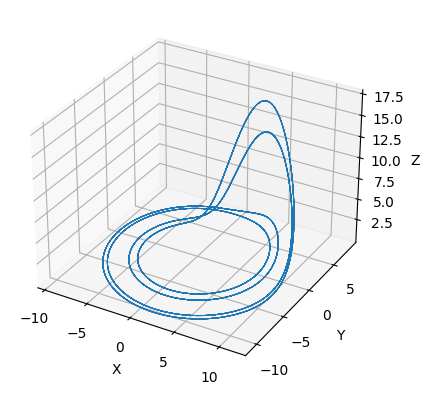

In [106]:
limit=40000
x_solved = np.array(sol.y)[0,limit:] #(1st in array,10000 values)
y_solved = np.array(sol.y[100,limit:]) #(101st in array,10000 values) 
z_solved = np.array(sol.y[200,limit:]) #(201st in array,10000 values)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_solved, y_solved, z_solved, lw=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# ax.grid(False)

#ax.set_title('Rössler Attractor for a =' +str(a)+", d = "+str(d)+", k ="+str(k))
plt.show()

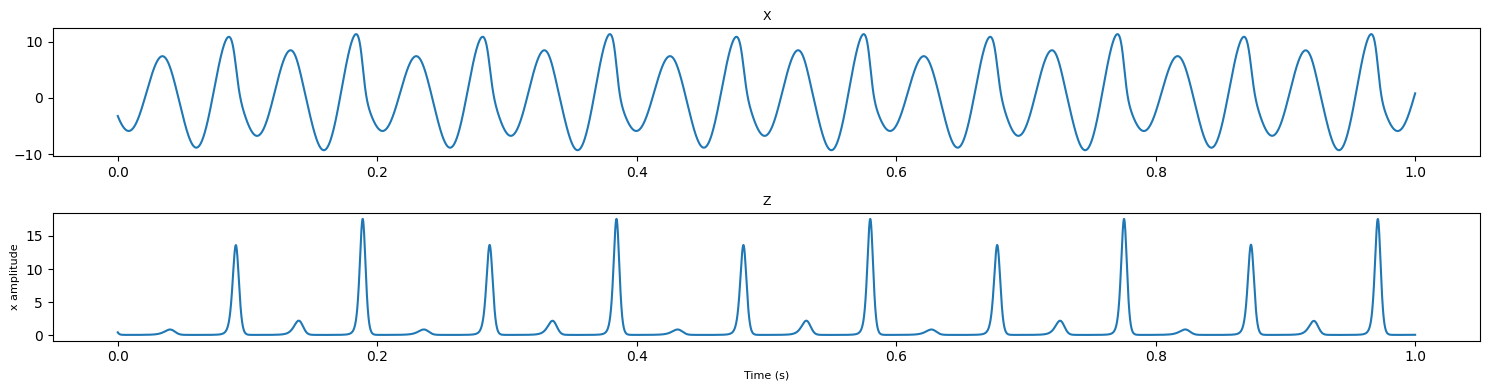

In [95]:
t= np.linspace(0,1,50000)
x_vals = np.array(sol.y)[0:100,:]
z_vals= np.array(sol.y)[200:300,:]
x_solved = np.array(sol.y)[0,50000:100000]
z_solved = np.array(sol.y)[200,50000:100000]
plt.figure(figsize = (15,4))
plt.subplot(211)
plt.plot(t, x_solved)
plt.title('X', fontsize = 9)
plt.subplot(212)
plt.plot(t, z_solved)
plt.title('Z', fontsize = 9)
plt.xlabel('Time (s)', fontsize = 8)
plt.ylabel('x amplitude', fontsize = 8)
plt.tight_layout()

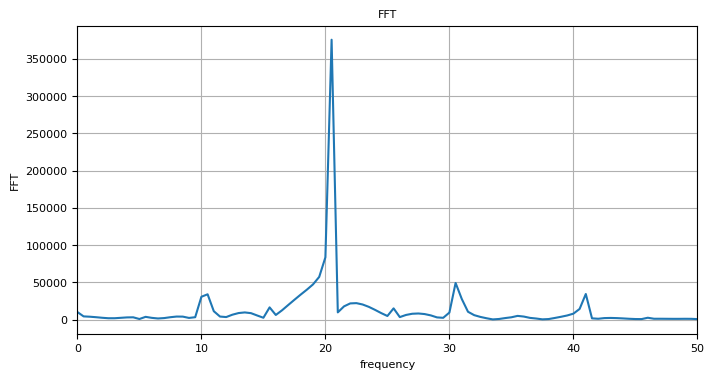

In [105]:
sampling_rate = 50000
fft_output = np.fft.fft(x_vals[0])
N_fft = len(fft_output)
#print(N_fft)
n = np.arange(N_fft)
T = N_fft/sampling_rate
freq = n/T
#print(fft_output)
#/np.linalg.norm(np.abs(fft_output))))
plt.figure(figsize = (8,4))
y_db = np.abs(fft_output)
plt.plot(freq, y_db)
plt.xlim(0,50)
#plt.ylim(0,1)
plt.title('FFT',fontsize="8")
plt.xlabel('frequency',fontsize="8")
plt.ylabel('FFT',fontsize="8")
plt.xticks(fontsize="8")
plt.yticks(fontsize = '8')

plt.grid()

Correlation analysis

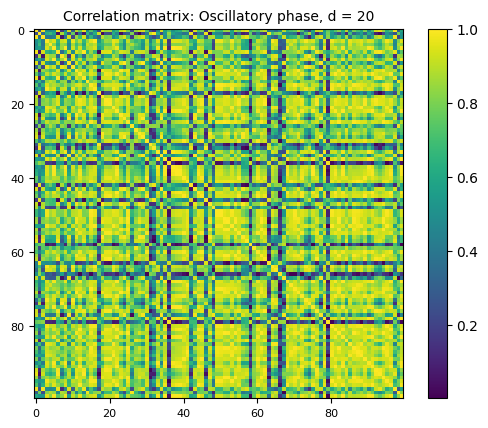

In [72]:
corr = np.corrcoef((x_vals))
plt.imshow(np.abs(corr))
plt.colorbar()
plt.title('Correlation matrix: Oscillatory phase, d = ' + str(d), fontsize = 10)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

In [73]:

np.mean(corr[np.triu_indices(4, k = 1)])

0.2127722132481161

In [74]:
d_values={'X_Values':x_solved, 'Z_Values':z_solved, "Time axis":t}
file_path='D:\CNS IITM\Chaotic Network\Pickle Files\Values_for_d=20.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(d_values, f)

In [60]:
with open(file_path, 'rb') as f:
    loaded_data = pickle.load(f)

print(loaded_data.keys())

dict_keys(['X_Values', 'Z_Values', 'Time axis'])


In [21]:
# #Power Spectral Analysis
# psa=np.square(np.abs(fft_output))/(N_fft*N_fft)
# plt.figure(figsize = (4,2))
# plt.plot(freq,psa)
# plt.xlim(0,5)
# plt.title('PSA',fontsize="8")
# plt.xlabel('frequency',fontsize="8")
# plt.ylabel('PSA',fontsize="8")
# plt.xticks(fontsize="8")
# plt.yticks(fontsize = '8')
# plt.grid()